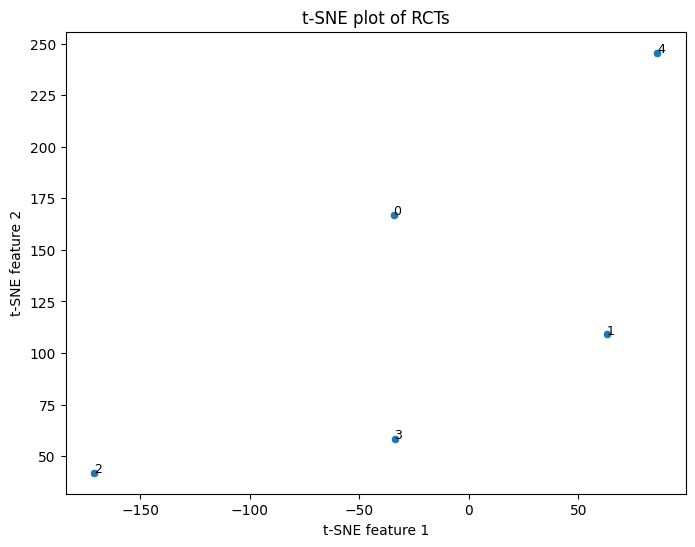

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Given data
data = {
    'Age': [30, 25, 100, 32, 1],
    'Blood Pressure': [123, 121, 140, 130, 60],
    'Cholesterol Level': [198, 187, 250, 202, 199],
    'Weight': [70, 60, 150, 74, 10],
    'BMI': [20, 25, 50, 27, 5],
    'Smoker': ['Yes', 'No', 'Yes', 'No', 'No'],
    'Exercise': ['Yes', 'Yes', 'No', 'Yes', 'No'],
    'Diet': ['Good', 'Good', 'Bad', 'Good', 'Good'],
}

df = pd.DataFrame(data)

# Preprocessing
categorical_features = ['Smoker', 'Exercise', 'Diet']
numerical_features = df.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

df_processed = preprocessor.fit_transform(df)

# t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=3, learning_rate=200)
tsne_results = tsne.fit_transform(numerical_features)

min_val = np.min(tsne_results)
max_val = np.max(tsne_results)

# Manual Min-Max scaling
tsne_results_scaled = (tsne_results - min_val) / (max_val - min_val)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])

# Label each point with its column index
for i, point in enumerate(tsne_results):
    plt.text(point[0], point[1], str(i), fontsize=9)

plt.title('t-SNE plot of RCTs')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()
